# <center> Coursera Capstone Report <center>
### <center> Optimal Location for a Vietnamese Restaurant in Austin, TX <center> <br> <center> Cathy Le <center>

## Introduction and Business Problem
<br>
Beloved for its quirky Texan charm, booming employment, scenic nature and live music, Austin is met with an increasing number of vistors as well as permanent residents every year. On top of being a rapidly growing and upcoming tech city, Austin has an avid food culture, many of which start small as food trucks or modest venues. 

New businesses are met with great potential and opportunity in Austin due to the city's support of local startups. The success of the business itself will depend largely on its location as there needs to be a balance of competition and demand from the surrounding area.

The business problem that this report will be catering to is a group of stakeholders interested in opening a Vietnamese restaurant in the heart of Austin, Texas. They seek to cater to the downtown region where the students of The University of Texas reside. We will aim to find the optimal location and to do so we must consider areas that are proven to be sucessful for similar businesses.

There are other factors to consider concerning this problem such as the desire for low competition while retaining high demand. Competition comes from restaurants which also serve Vietnamese or similar cuisines. Demand can be gauged by the density of restaurants in the area, specifically ones that serve opposing cuisines, as we will want a location with high foot traffic to draw people into our business. Competition with other Vietnamese restaurants can be helpful to some extent in bringing in customers to the area, so for this project we will use the presence of Vietnamese restaurants as an indicator for a promising location.

## Data
<br>

We will solely be using Foursquare location data to solve this problem. Our problem requires us to find high ranking Vietnamese restaurants in Austin and visualize them on a map. Afterwards, making clusters of these resturants will help to identify areas where success is more likely.

With Foursquare API we will gather information on venues and local businesses. We will be collecting the number of restaurants, types, and locations in the corresponding Austin neighborhood. Foursquare will also be used to categorize the businesses based on what food they serve, differentiating Vietnamese restaurants from other cuisines. 

Using geographic location to cluster the resturants, we can explore and observe which areas are the most dense in demand for food venues. We will be using the "explore" request in Foursquare and passing specific parameters for Vietnamese or similar cuisines.

## Method and Analysis

We will need to locate where the successful Vietnamese resturants are and cluster that data. 

#### Import the necessary libraries

In [2]:
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.6.16          |           py36_1         149 KB  conda-forge
    openssl-1.1.1c             |       h516909a_0         2.1 MB  conda-forge
    ca-certificates-2019.6.16  |       hecc5488_0         145 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.49-py_0         conda-forge
    geopy:           1.20.0-py_0       conda-forge

The following packages will be UPDATED:

    ca-

In [3]:
import json # library to handle JSON files

In [14]:
!conda install -c conda-forge descartes --yes
from descartes import PolygonPatch

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - descartes


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    descartes-1.1.0            |             py_3           6 KB  conda-forge

The following NEW packages will be INSTALLED:

    descartes: 1.1.0-py_3 conda-forge


descartes-1.1.0      | 6 KB      | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [24]:
!conda install -c conda-forge shapely --yes
from shapely import geometry

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - shapely


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    shapely-1.6.4              |py36hec07ddf_1006         329 KB  conda-forge
    geos-3.7.2                 |       he1b5a44_1         872 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.2 MB

The following NEW packages will be INSTALLED:

    geos:    3.7.2-he1b5a44_1        conda-forge
    shapely: 1.6.4-py36hec07ddf_1006 conda-forge


shapely-1.6.4        | 329 KB    | ##################################### | 100% 
geos-3.7.2           | 872 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


#### Set up Foursquare API

In [36]:
CLIENT_ID = '5BURNXFD4JD3OUXRRQXNRC3XZCK5HBFEH03N4KSIP0F1CP1H' # your Foursquare ID
CLIENT_SECRET = '51A4KROSWJOX04TKEEXZSKQAIVNVQTEXC5T4CDLCDEQB1UPR' # your Foursquare Secret
VERSION = '201902012'
LIMIT = 99
print('Your credentails:')
print('CLIENT_ID:' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID:5BURNXFD4JD3OUXRRQXNRC3XZCK5HBFEH03N4KSIP0F1CP1H
CLIENT_SECRET:51A4KROSWJOX04TKEEXZSKQAIVNVQTEXC5T4CDLCDEQB1UPR


#### Get coordinates with Geolocator

In [81]:
#University of Texas address
address = 'Austin, TX 78712' 

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of The University of Texas are {}, {}.'.format(latitude, longitude))

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.


The geograpical coordinate of The University of Texas are 30.2711286, -97.7436995.


In [115]:
search_query = 'Restaurant'
radius = 5000
print(search_query + ' .... OK!')

url1 = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url1

Restaurant .... OK!


'https://api.foursquare.com/v2/venues/explore?client_id=5BURNXFD4JD3OUXRRQXNRC3XZCK5HBFEH03N4KSIP0F1CP1H&client_secret=51A4KROSWJOX04TKEEXZSKQAIVNVQTEXC5T4CDLCDEQB1UPR&ll=30.2711286,-97.7436995&v=201902012&query=Restaurant&radius=5000&limit=100000'

In [117]:
results1 = requests.get(url1).json()
results1

{'meta': {'code': 200, 'requestId': '5d54d051c530930039456b69'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': '$-$$$$', 'key': 'price'},
    {'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Austin',
  'headerFullLocation': 'Austin',
  'headerLocationGranularity': 'city',
  'query': 'restaurant',
  'totalResults': 246,
  'suggestedBounds': {'ne': {'lat': 30.316128645000045,
    'lng': -97.69169227279475},
   'sw': {'lat': 30.226128554999956, 'lng': -97.79570672720526}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4aa06c38f964a520923f20e3',
       'name': "Perry's Steakhouse",
       'location': {'address': '114 W 7th St',
        'crossStreet': 'at Colorado St',
        'lat': 30.269373758193904,
        'lng': -97

In [118]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [119]:
venues = results1['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Perry's Steakhouse,Steakhouse,30.269374,-97.743676
1,Chi'lantro BBQ,Food Truck,30.270657,-97.741912
2,Walton's Fancy and Staple,Deli / Bodega,30.269686,-97.748928
3,Turf N' Surf Poboys,Cajun / Creole Restaurant,30.267143,-97.745739
4,Eureka!,Burger Joint,30.267843,-97.741240


In [121]:
nearby_venues["categories"].value_counts().head()

Restaurant             10
American Restaurant    10
Food Truck             10
Mexican Restaurant      7
BBQ Joint               5
Name: categories, dtype: int64

#### Search query by passing Vietnamese Restaurant

In [122]:
search_query = 'Vietnamese Restaurant'
radius = 5000
print(search_query + ' .... OK!')

url2 = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url2

Vietnamese Restaurant .... OK!


'https://api.foursquare.com/v2/venues/explore?client_id=5BURNXFD4JD3OUXRRQXNRC3XZCK5HBFEH03N4KSIP0F1CP1H&client_secret=51A4KROSWJOX04TKEEXZSKQAIVNVQTEXC5T4CDLCDEQB1UPR&ll=30.2711286,-97.7436995&v=201902012&query=Vietnamese Restaurant&radius=5000&limit=100000'

####  Transform Foursquare results from Json file to Dataframe

In [123]:
results2 = requests.get(url2).json()

In [70]:
venues = results['response']['groups'][0]['items']

dataframe = json_normalize(venues)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 28 columns):
reasons.count                          31 non-null int64
reasons.items                          31 non-null object
referralId                             31 non-null object
venue.categories                       31 non-null object
venue.delivery.id                      3 non-null object
venue.delivery.provider.icon.name      3 non-null object
venue.delivery.provider.icon.prefix    3 non-null object
venue.delivery.provider.icon.sizes     3 non-null object
venue.delivery.provider.name           3 non-null object
venue.delivery.url                     3 non-null object
venue.id                               31 non-null object
venue.location.address                 25 non-null object
venue.location.cc                      31 non-null object
venue.location.city                    31 non-null object
venue.location.country                 31 non-null object
venue.location.crossStreet        

In [124]:
df=pd.DataFrame()
df['venue_ID']=dataframe['venue.id']
df['name']=dataframe['venue.name']
df['lat']=dataframe['venue.location.lat']
df['lng']=dataframe['venue.location.lng']
df.head()

,venue_ID,name,lat,lng
0,4ef4c212b8f77e0f983c04e4,Elizabeth St. Café,30.249828,-97.754829
1,56a2e11e498e4ab3feb17449,Pho Please,30.243062,-97.728082
2,4a9ebac6f964a520f63a20e3,888 Vietnamese Restaurant,30.229627,-97.730117
3,4a357b73f964a520099d1fe3,Hai Ky,30.230977,-97.735033
4,5816307538fa252712aba520,Heo Eatery,30.331042,-97.723462


#### Visualize Vietnamese resturants with Folium map

In [125]:
map_austin = folium.Map(location=[latitude, longitude], zoom_start=13)

for lat, lng, name,venue_ID in zip(df['lat'], df['lng'], df['name'],df['venue_ID']):
    
        label = '{}, {}'.format(name, venue_ID)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.7,
            parse_html=False).add_to(map_austin)
map_austin

#### Use K-means clustering algorithm to get reccommended location

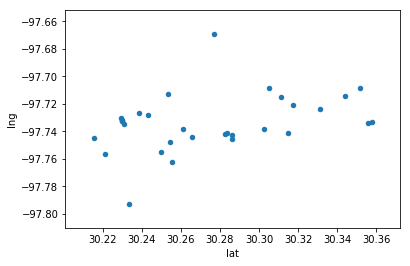

In [79]:
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt # plotting library


%matplotlib inline

df.plot(x='lat',y='lng',kind='scatter')

#### Create 5 clusters

In [80]:
k_means = KMeans(init = "k-means++", n_clusters = 5, n_init = 12)
df_array=np.array(df[['lat','lng']])
k_means.fit(df_array)
k_labels=pd.DataFrame(k_means.labels_)
k_labels.info()
df['cluster']=k_labels
df.groupby('cluster').count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 1 columns):
0    31 non-null int32
dtypes: int32(1)
memory usage: 204.0 bytes


,venue_ID,name,lat,lng
cluster,,,,
0,9,9,9,9
1,10,10,10,10
2,5,5,5,5
3,6,6,6,6
4,1,1,1,1


#### Visualize clusters on Folium map

In [61]:
for lat, lng, name,venue_ID,cluster in zip(df['lat'], df['lng'], df['name'],df['venue_ID'],df['cluster']):
    
    if cluster == 0:
        label = '{}, {}'.format(name, venue_ID)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='red',
            fill=True,
            fill_color='red',
            fill_opacity=0.7,
            parse_html=False).add_to(map_austin)  
    if cluster == 1:
        label = '{}, {}'.format(name, venue_ID)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='orange',
            fill=True,
            fill_color='orange',
            fill_opacity=0.7,
            parse_html=False).add_to(map_austin)  
    if cluster == 2:
        label = '{}, {}'.format(name, venue_ID)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='green',
            fill=True,
            fill_color='green',
            fill_opacity=0.7,
            parse_html=False).add_to(map_austin)  
    if cluster == 3:
        label = '{}, {}'.format(name, venue_ID)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.7,
            parse_html=False).add_to(map_austin)
    if cluster == 4:
        label = '{}, {}'.format(name, venue_ID)
        label = folium.Popup(label, parse_html=True)
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            popup=label,
            color='purple',
            fill=True,
            fill_color='purple',
            fill_opacity=0.7,
            parse_html=False).add_to(map_austin)  
    
map_austin

#### Get reccomended location for each of the 5 clusters using the mean of the coordinates

In [62]:
center_location=df.groupby('cluster').mean()
center_location

,lat,lng
cluster,,
0,30.308689,-97.739885
1,30.233123,-97.730973
2,30.257286,-97.749436
3,30.284638,-97.742914
4,30.253432,-97.713051


#### Visualize reccomended locations on Folium map

In [65]:
i=0
for lat, lng in zip(center_location['lat'],center_location['lng']):
    folium.Marker([lat,lng], popup='Recommend for Group '+ str(i)).add_to(map_austin)
    i=i+1
map_austin

## Results and Discussion

Our analysis shows us that there are a small number of Vietnamese areas that are a convenient distance from the University of Texas. Of these 18 restaurants, many are scattered with no common area; however, there are some areas that are more dense with Vietnamese restaurants than others. 

We see that the purple cluster is the closest to the University of Texas and one of the more prominent clusters. This would be a good area to start a business as it will be close to the college campus and is within an area that has seen sucess from other similar businesses. By finding the mean coordinates of this purple cluster, this gives us a good starting point of where we should look when choosing a location.

The second most dense cluster is the yellow cluster, of which three spots are on the same street. The algorithm does not pick up on this and thus gave us the mean coordinates of those three and two nearby restaurants. This area would also be a good place for a vietnamese restaurant. The mean location given is sandwiched between multiple spots, so it avoids close competition while still being in an area with Vietnamese presence.

The green cluster is the most spread out, but this may be due to the fact it is located around the river downtown which is a restaurant dense area. Though less dense this can actually be an advantage as we get the benefits of a downtown location while being not too close to our competitors.

The purple and red clusters seem to be outliers in that they only have one or two restaurants. It would be riskier to start a business here as there is little experience to back up the success of these locations.

## Conclusion

The purpose of this project was to identify an area close to the University of Texas where our stakeholders could open a Vietnamese Resturant. The optimal location was found by calculating areas of dense Vietnamese resturants from Foursquare data. From this we identified five clusters whose mean location are potentially fruitful based on the already existing Vietnamese restaurants that preside there. 

This anlysis was solely based on geographic data and the use of other Vietnamese restaurants. There were many things that were assumed from the visual data that can be supported by extra analysis such as the density of the cluster. Because there were only 18 restaurants from which to draw data from, the clusters are apt to be not as representative and more difficult to cluster. We used 5 clusters in this analysis, but using more or less will change the mean location coordinates. 

These are not definite locations but rather sones of interests and starting point for exploration that can be further elaborated upon by the stakeholders.

This analysis can be expanded by taking into consideration other factors such as proximity to roads, attractions, noise level, land availability, presence of other venues, prices, and ratings of the Vietnamese restaurants. 
